In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import operator
import random as rand

#KNN

## KNN numpy only

In [ ]:
data = sns.load_dataset('iris')

In [ ]:
indices = np.random.permutation(data.shape[0]) # random index
print(indices)
div = int(0.75 * len(indices))
print(div)
development_id =indices[:div]
test_id =  indices[div:]

development_set, test_set = data.loc[development_id,:], data.loc[test_id,:]
print("Development Set:\n", development_set, "\n\nTest Set:\n", test_set)

[ 16  81  86  50  65  89  99  63  56  78 131 119  94   8 132  82  37   5
  64  42 126 115 104  23 122 121 129 142 106  43  24  52 138  73  46 143
 148  34  62  67  71  20  32  68  44  22  21  59  18  85 125   4  66  54
 130   3  84  55  19  75  77  49  27  41  93 141 135  10  53  74 144   6
 127 108 145  72 128  33  98 139 114 101  58 112  90  70   0 103  26   7
  25  17  11 146  12 105  96 136 116 107  48   9  80 111 147  57 102 120
 117 109  28  83 100  30 124   1  38  87  91  31  61  51 149 113  92  39
  60  29  14 134  47  15  40  76 110 123 137  95   2 133 140  69  45  35
  36  88 118  13  79  97]
112
Development Set:
      sepal_length  sepal_width  petal_length  petal_width     species
16            5.4          3.9           1.3          0.4      setosa
81            5.5          2.4           3.7          1.0  versicolor
86            6.7          3.1           4.7          1.5  versicolor
50            7.0          3.2           4.7          1.4  versicolor
65            6.7 

In [ ]:
mean_development_set = development_set.mean()
mean_test_set = test_set.mean()
std_development_set = development_set.std()
std_test_set = test_set.std()

<ipython-input-116-988ec2da53bc>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_development_set = development_set.mean()
<ipython-input-116-988ec2da53bc>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_test_set = test_set.mean()
<ipython-input-116-988ec2da53bc>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_development_set = development_set.std()
<ipython-input-116-988ec2da53bc>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_onl

In [ ]:
test_class = list(test_set.iloc[:,-1])
dev_class = list(development_set.iloc[:,-1])

#### การหาระยะห่างแบบต่างๆ

In [ ]:
def euclideanDistance(data_1, data_2, data_len):
    dist = 0
    for i in range(data_len):
        dist = dist + np.square(data_1[i] - data_2[i])
    return np.sqrt(dist)

def normalizedEuclideanDistance(data_1, data_2, data_len, data_mean, data_std):
    n_dist = 0
    for i in range(data_len):
        n_dist = n_dist + (np.square(((data_1[i] - data_mean[i])/data_std[i]) - ((data_2[i] - data_mean[i])/data_std[i])))
    return np.sqrt(n_dist)

def cosineSimilarity(data_1, data_2):
    dot = np.dot(data_1, data_2[:-1])
    norm_data_1 = np.linalg.norm(data_1)
    norm_data_2 = np.linalg.norm(data_2[:-1])
    cos = dot / (norm_data_1 * norm_data_2)
    return (1-cos)

knn

In [ ]:
def knn(dataset, testInstance, k, dist_method, dataset_mean, dataset_std): 
    distances = {}
    length = testInstance.shape[1]
    if dist_method == 'euclidean':
        for x in range(len(dataset)):
            dist_up = euclideanDistance(testInstance, dataset.iloc[x], length)
            distances[x] = dist_up[0]
    elif dist_method == 'normalized_euclidean':
        for x in range(len(dataset)):
            dist_up = normalizedEuclideanDistance(testInstance, dataset.iloc[x], length, dataset_mean, dataset_std)
            distances[x] = dist_up[0]
    elif dist_method == 'cosine':
        for x in range(len(dataset)):
            dist_up = cosineSimilarity(testInstance, dataset.iloc[x])
            distances[x] = dist_up[0]
    # Sort values based on distance
    sort_distances = sorted(distances.items(), key=operator.itemgetter(1))
    neighbors = []
    # Extracting nearest k neighbors
    for x in range(k):
        neighbors.append(sort_distances[x][0])
    # Initializing counts for 'class' labels counts as 0
    counts = {"Iris-setosa" : 0, "Iris-versicolor" : 0, "Iris-virginica" : 0}
    # Computing the most frequent class
    for x in range(len(neighbors)):
        response = dataset.iloc[neighbors[x]][-1] 
        if response in counts:
            counts[response] += 1
        else:
            counts[response] = 1
    # Sorting the class in reverse order to get the most frequest class
    sort_counts = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
    return(sort_counts[0][0])

In [ ]:
# Creating a list of list of all columns except 'class' by iterating through the development set
row_list = []
for index, rows in development_set.iterrows():
    my_list =[rows.sepal_length, rows.sepal_width, rows.petal_length, rows.petal_width]       
    row_list.append([my_list])
# k values for the number of neighbors that need to be considered
k_n = [1, 3, 5, 7]
# Distance metrics
distance_methods = ['euclidean', 'normalized_euclidean', 'cosine']
# Performing kNN on the development set by iterating all of the development set data points and for each k and each distance metric
obs_k = {}
for dist_method in distance_methods:
    development_set_obs_k = {}
    for k in k_n:
        development_set_obs = []
        for i in range(len(row_list)):
            development_set_obs.append(knn(development_set, pd.DataFrame(row_list[i]), k, dist_method, mean_development_set, std_development_set))
        development_set_obs_k[k] = development_set_obs
    # Nested Dictionary containing the observed class for each k and each distance metric (obs_k of the form obs_k[dist_method][k])
    obs_k[dist_method] = development_set_obs_k
#print(obs_k)

In [ ]:
print(obs_k)

{'euclidean': {1: ['setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa', 'virginica', 'virginica', 'virginica', 'setosa', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'setosa', 'setosa', 'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor', 'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica', 'virginica', 'virginica', 'versicolor', 'virginica', 'setosa', 'versicolor'

In [ ]:
# Calculating the accuracy of the development set by comparing it with the development set 'class' list created earlier
accuracy = {}
for key in obs_k.keys():
    accuracy[key] = {}
    for k_value in obs_k[key].keys():
        #print('k = ', key)
        count = 0
        for i,j in zip(dev_class, obs_k[key][k_value]):
            if i == j:
                count = count + 1
            else:
                pass
        accuracy[key][k_value] = count/(len(dev_class))

# Storing the accuracy for each k and each distance metric into a dataframe
df_res = pd.DataFrame({'k': k_n})
for key in accuracy.keys():
    value = list(accuracy[key].values())
    df_res[key] = value
print(df_res)

   k  euclidean  normalized_euclidean    cosine
0  1   1.000000              1.000000  1.000000
1  3   0.964286              0.964286  0.973214
2  5   0.964286              0.973214  0.982143
3  7   0.964286              0.982143  0.982143


[Text(0, 0.5, 'Accuracy')]

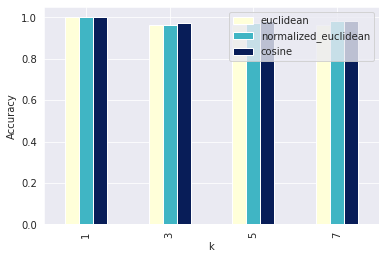

In [ ]:
# Plotting a Bar Chart for accuracy
draw = df_res.plot(x='k', y=['euclidean', 'normalized_euclidean', 'cosine'], kind="bar", colormap='YlGnBu')
draw.set(ylabel='Accuracy')

## Implementation of K-Nearest-Neighbors from Scratch

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import datasets

data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
# data = pd.read_csv('iris.data', 
#                    names = data_names)
data = sns.load_dataset('iris')

# rename 
data.columns = data_names

In [ ]:
all_vals = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
all_labels = data['label'].values
unique_labels = np.unique(all_labels)
print(unique_labels)
#change string labels to numbers
new_labels = np.zeros(len(all_labels))
for i in range(0,len(unique_labels)):
    new_labels[all_labels == unique_labels[i]] = i
all_labels = new_labels

['setosa' 'versicolor' 'virginica']


In [ ]:
#Split dataset using scikit learn split function - keep 25 data points as test_set
(training_data, test_data, training_labels, test_labels) = train_test_split(all_vals, all_labels, test_size=0.166)

In [ ]:
def knnclassify(test_data, training_data, training_labels, k=3):
    #training_labels = [0, 1, 2] => ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
    
    #contains the predicted label for each test data point
    pred_labels=[]
    
    #for each test_data point
    for i in range(len(test_data)):
        distances = []
            
        #compute euclidean distance with all points of the training set
        for j in range(len(training_data)):
            euclidean_distance = np.linalg.norm(test_data[i]-training_data[j])
            #Pair each distance with the training label of the training data point
            distances.append([euclidean_distance, training_labels[j]]) 
                 
        #sort pairs by distances to get the K nearest neighbor(s) at the top
        distances.sort()
        
        #select number of k neighbors
        k_nearests = distances[0:k]
    
        #Collect vote/class_label for each nearest neighbor (k=3 there are 3 votes) 
        votes = [k_nearest[1] for k_nearest in k_nearests]
        
        #Store the most_common vote for each test data point into class_label_result
        class_label_result = Counter(votes).most_common()[0][0]
    
        #Append predicted label for the test data point into pred_labels
        pred_labels.append(class_label_result)
    
    return pred_labels

In [ ]:
pred_labels = knnclassify(test_data, training_data, training_labels)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=test_labels, y_pred=pred_labels)

0.96

## K nn ที่อาจารย์สอน

import ดอกไม้

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [ ]:
import numpy as np
df['species'].unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
itrain = np.r_[:25, 50:75, 100:125]
itest = np.r_[25:50, 75:100, 125:150]

In [ ]:
X = df.iloc[:, :4].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
Y = df.iloc[:, -1].values
Y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [ ]:
Xtrain = X[itrain]
Xtest = X[itest]
Ytrain = Y[itrain]
Ytest = Y[itest]

In [ ]:
def NN(x):
  return Ytrain[np.sum((Xtrain - x) ** 2, axis=1).argmin()]

In [ ]:
z = []
for x in Xtest:
  z.append(NN(x))
z = np.array(z)

In [ ]:
np.sum(z == Ytest) / len(z) * 100

94.66666666666667

add K

In [ ]:
def KNN(x, k):
  count = np.zeros(len(list(df['species'].unique()))) # [0, 0, 0]
  for s in Ytrain[np.sum((Xtrain - x) ** 2, axis=1).argsort()][:k]:  
    f = lambda x: list(df['species'].unique()).index(x)  # return index
    count[f(s)]+=1
  return list(df['species'].unique())[count.argmax()]

In [ ]:
print(list(df['species'].unique()))
print(len(list(df['species'].unique())))
print(np.zeros(len(list(df['species'].unique()))))
print(Ytrain[np.sum((Xtrain - Xtest[0]) ** 2, axis=1).argsort()][:5])
print(list(df['species'].unique()).index('setosa')  )

['setosa', 'versicolor', 'virginica']
3
[0. 0. 0.]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
0


In [ ]:
ac = []
for k in range(1,10):
  z = []

  for x in Xtest:
    z.append(KNN(x, k))

  z = np.array(z)
  ac.append(np.sum(z == Ytest) / len(z) * 100)


x = [i for i in range(1,76)]
# sns.scatterplot(x=x,y=ac)

# K-means

## K means ของอาจารย์

In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
X = df.iloc[:, :-1].values

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
K = 3
C = X[np.random.permutation(len(X))[:K]] # random index

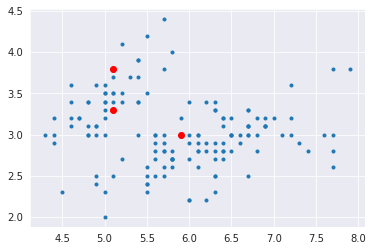

In [ ]:
plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(C[:, 0], C[:, 1], 'or')
plt.show()

In [ ]:
D = np.zeros((K, len(X)))
for k in range(K):
  D[k] = np.sum((X - C[k]) ** 2, axis=1)

In [ ]:
idx = D.argmin(axis=0)

In [ ]:
for k in range(K):
  C[k] = X[idx == k].mean(axis=0)

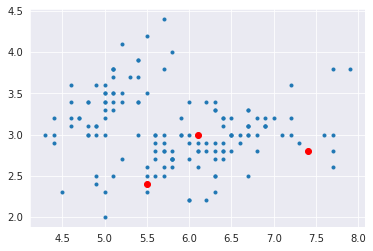

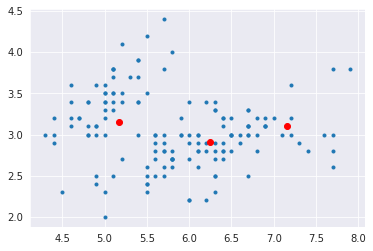

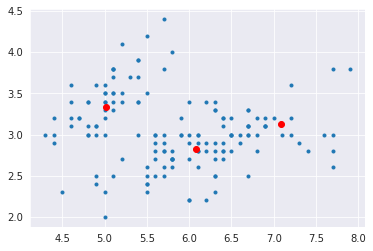

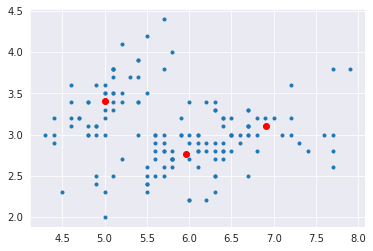

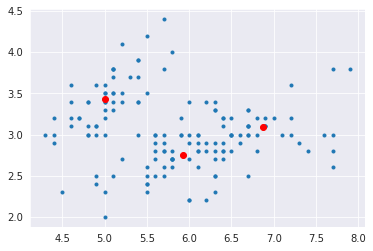

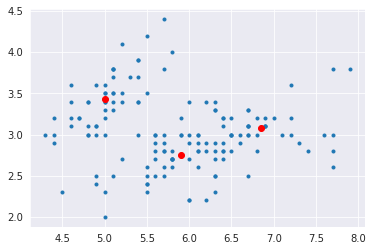

In [ ]:
K = 3
C = X[np.random.permutation(len(X))[:K]]
while True:
  # data visualization
  plt.plot(X[:, 0], X[:, 1], '.')
  plt.plot(C[:, 0], C[:, 1], 'or')
  plt.show()

  # distance
  D = np.zeros((K, len(X)))
  for k in range(K):
    D[k] = np.sum((X - C[k]) ** 2, axis=1)
  idx = D.argmin(axis=0)

  # update centroids
  Cold = C.copy() 
  for k in range(K):
    C[k] = X[idx == k].mean(axis=0)

  # check terminate condition
  if np.sum(np.abs(Cold - C)) == 0:
    break

In [ ]:
C

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ]])

In [ ]:
idx

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
classes = list(df.iloc[:, -1].unique())

In [ ]:
Y = df.iloc[:, -1].values
for cls in classes:
  Y[Y == cls] = classes.index(cls)

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

In [ ]:
C_actual = np.zeros((K, X.shape[1]))
for k in range(K):
  C_actual[k] = X[Y == k].mean(axis=0)

In [ ]:
C_actual

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [ ]:
C

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ]])

In [ ]:
to_actual = {}
for k in range(K):
  to_actual[k] = np.sum((C_actual - C[k]) ** 2, axis=1).argmin()

In [ ]:
idx_actual = idx.copy()

In [ ]:
for k, v in to_actual.items():
  i = idx == k
  idx_actual[i] = v

In [ ]:
idx

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
idx_actual

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [ ]:
np.sum(Y == idx_actual) / len(Y)

0.8933333333333333

## Implement K-Means clustering from Scratch by Theo Botella

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand
from sklearn.model_selection import train_test_split


data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
# data = pd.read_csv('iris.data', 
#                    names = data_names)
data = sns.load_dataset('iris')

# rename 
data.columns = data_names

In [ ]:
all_vals = data.drop(columns=['label']).values.tolist()

 ### Place K centroids at random locations

In [ ]:
def random_centroids(all_vals, K):    
    centroids = []
    #Place K centroids at random locations
    for i in range(K):
        centroid = all_vals[rand.randint(0, 149)]
        centroids.append(centroid)
    return centroids

### Assign all data points to the closest center

In [ ]:
def assign_cluster(all_vals, centroids):
    assignments = []

    for data_point in all_vals:
        dist_point_clust = []

        for centroid in centroids:
            d_clust = np.linalg.norm(np.array(data_point) - np.array(centroid))
            dist_point_clust.append(d_clust)
        
        assignment = np.argmin(dist_point_clust)
        assignments.append(assignment)

    return assignments    

### Compute the new centroids
By computing the mean of all the points assigned to each cluster

In [ ]:
def new_centroids(all_vals, centroids, assignments, K):
    new_centroids = []
    for i in range(K):
        pt_cluster = []
        for x in range(len(all_vals)):
                if (assignments[x] == i):
                    pt_cluster.append(all_vals[x])
        mean_c = np.mean(pt_cluster, axis=0)
        new_centroids.append(mean_c)

    return new_centroids

### Compute SSE

In [ ]:
def sse(all_vals, assignments, centroids):
    errors = []
    
    for i in range(len(all_vals)):
        #get assigned centroid for each point
        centroid = centroids[assignments[i]]
    
        #compute the distance (error) between one point and its closest centroid
        error = np.linalg.norm(np.array(all_vals[i]) - np.array(centroid))
        
        #append squared error to the list of error
        errors.append(error**2)
        
    #and sum up all the errors
    sse = sum(errors)
    
    return sse

### Given a set of assignments of points to clusters, compute the new centroids for every cluster, by taking the mean of all the points assigned to each cluster.

In [ ]:
def kmeans_clustering(all_vals,K,max_iter = 100, tol = pow(10,-3) ):
    it = -1
    all_sse = []
    assignments = []
    
    #Place K centroids at random locations
    centroids = random_centroids(all_vals, K)

   
    #Until algorithm converges
    while (len(all_sse)<=1 or (it < max_iter and np.absolute(all_sse[it] - all_sse[it-1])/all_sse[it-1] >= tol)):
        it += 1
        #Assign all data points to the closest center
        assignments = assign_cluster(all_vals, centroids)
        
        #Compute the new centroids
        centroids = new_centroids(all_vals, centroids, assignments, K)
        
        #Compute SSE
        sse_kmeans = sse(all_vals, assignments, centroids)
        all_sse.append(sse_kmeans)        
        
     
    return (assignments, centroids, all_sse, it)

In [ ]:
result = kmeans_clustering(all_vals,K=3)

### K-means Visualization

In [ ]:
centroids_x = [result[1][x][0] for x in range(len(result[1]))] #sepal_length: [0] 
centroids_y = [result[1][x][2] for x in range(len(result[1]))] #petal_length: [2]

In [ ]:
x = data['sepal_length']
y = data['petal_length']
assignments = result[0]

Text(0, 0.5, 'petal_length')

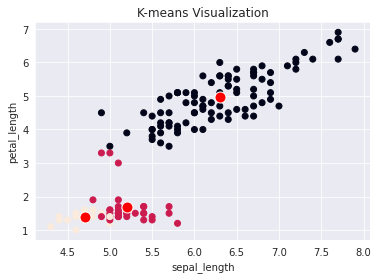

In [ ]:
plt.scatter(x, y, c=assignments)
plt.plot(centroids_x,centroids_y, c='white', marker='.', linewidth='0.01', markerfacecolor='red', markersize=22)

plt.title("K-means Visualization")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")

# Decision Tree

##  Decision Tree helper functions 

In [ ]:
# coding: utf-8

import numpy as np
import pandas as pd


# 1. Decision Tree helper functions
# 1.1 Data pure?
def check_purity(data):
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

    
# 1.2 Create Leaf
def create_leaf(data, ml_task):
    
    label_column = data[:, -1]
    if ml_task == "regression":
        leaf = np.mean(label_column)
        
    # classfication    
    else:
        unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
        index = counts_unique_classes.argmax()
        leaf = unique_classes[index]
    
    return leaf


# 1.3 Determine potential splits
def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1): # excluding the last column which is the label
        values = data[:, column_index]
        unique_values = np.unique(values)
        
        potential_splits[column_index] = unique_values
    
    return potential_splits


# 1.4 Determine Best Split
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy


def calculate_mse(data):
    actual_values = data[:, -1]
    if len(actual_values) == 0:   # empty data
        mse = 0
        
    else:
        prediction = np.mean(actual_values)
        mse = np.mean((actual_values - prediction) **2)
    
    return mse


def calculate_overall_metric(data_below, data_above, metric_function):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_metric =  (p_data_below * metric_function(data_below) 
                     + p_data_above * metric_function(data_above))
    
    return overall_metric


def determine_best_split(data, potential_splits, ml_task):
    
    first_iteration = True
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            
            if ml_task == "regression":
                current_overall_metric = calculate_overall_metric(data_below, data_above, metric_function=calculate_mse)
            
            # classification
            else:
                current_overall_metric = calculate_overall_metric(data_below, data_above, metric_function=calculate_entropy)

            if first_iteration or current_overall_metric <= best_overall_metric:
                first_iteration = False
                
                best_overall_metric = current_overall_metric
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value


# 1.5 Split data
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values >  split_value]
    
    # feature is categorical   
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]
    
    return data_below, data_above


# 2. Decision Tree Algorithm
# 2.1 Helper Function
def determine_type_of_feature(df):
    
    feature_types = []
    n_unique_values_treshold = 15
    for feature in df.columns:
        if feature != "label":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")
    
    return feature_types


# 2.2 Algorithm
def decision_tree_algorithm(df, ml_task, counter=0, min_samples=2, max_depth=5):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        leaf = create_leaf(data, ml_task)
        return leaf

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits, ml_task)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # check for empty data
        if len(data_below) == 0 or len(data_above) == 0:
            leaf = create_leaf(data, ml_task)
            return leaf
        
        # determine question
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
            
        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)
        
        # instantiate sub-tree
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, ml_task, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, ml_task, counter, min_samples, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base case).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree


# 3. Make predictions
# 3.1 One example
def predict_example(example, tree):
    
    # tree is just a root node
    if not isinstance(tree, dict):
        return tree
    
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return predict_example(example, residual_tree)

    
# 3.2 All examples of a dataframe
def make_predictions(df, tree):
    
    if len(df) != 0:
        predictions = df.apply(predict_example, args=(tree,), axis=1)
    else:
        # "df.apply()"" with empty dataframe returns an empty dataframe,
        # but "predictions" should be a series instead
        predictions = pd.Series()
        
    return predictions


# 3.3 Accuracy
def calculate_accuracy(df, tree):
    predictions = make_predictions(df, tree)
    predictions_correct = predictions == df.label
    accuracy = predictions_correct.mean()
    
    return accuracy

### Helper funtion

In [ ]:
# coding: utf-8

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

sns.set_style("darkgrid")


def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df


def generate_data(n, specific_outliers=[], n_random_outliers=None):
    
    # create data
    data = np.random.random(size=(n, 2)) * 10
    data = data.round(decimals=1)
    df = pd.DataFrame(data, columns=["x", "y"])
    df["label"] = df.x <= 5

    # add specific outlier data points
    for outlier_coordinates in specific_outliers:
        df = df.append({"x": outlier_coordinates[0],
                        "y": outlier_coordinates[1],
                        "label": True}, 
                       ignore_index=True)

    ## add random outlier data points
    if n_random_outliers:
        outlier_x_values =  (6 - 5) * np.random.random(size=n_random_outliers) + 5  # value between 5 and 6
        outlier_y_values = np.random.random(size=n_random_outliers) * 10

        df_outliers = pd.DataFrame({"x": outlier_x_values.round(decimals=2),
                                    "y": outlier_y_values.round(decimals=2),
                                    "label": [True] * n_random_outliers})

        df = df.append(df_outliers, ignore_index=True)
    
    return df


def plot_decision_boundaries(tree, x_min, x_max, y_min, y_max):
    color_keys = {True: "orange", False: "blue"}
    
    # recursive part
    if isinstance(tree, dict):
        question = list(tree.keys())[0]
        yes_answer, no_answer = tree[question]
        feature, _, value = question.split()
    
        if feature == "x":
            plot_decision_boundaries(yes_answer, x_min, float(value), y_min, y_max)
            plot_decision_boundaries(no_answer, float(value), x_max, y_min, y_max)
        else:
            plot_decision_boundaries(yes_answer, x_min, x_max, y_min, float(value))
            plot_decision_boundaries(no_answer, x_min, x_max, float(value), y_max)
        
    # "tree" is a leaf
    else:
        plt.fill_between(x=[x_min, x_max], y1=y_min, y2=y_max, alpha=0.2, color=color_keys[tree])
    
    return


def create_plot(df, tree=None, title=None):
    
    sns.lmplot(data=df, x="x", y="y", hue="label", 
               fit_reg=False, height=4, aspect=1.5, legend=False)
    plt.title(title)
    
    if tree or tree == False: # root of the tree might just be a leave with "False"
        x_min, x_max = round(df.x.min()), round(df.x.max())
        y_min, y_max = round(df.y.min()), round(df.y.max())

        plot_decision_boundaries(tree, x_min, x_max, y_min, y_max)
    
    return

## Iris Tree

The goal of this notebook is to code a decision tree classifier that can be used with the following API:

```Python
df = pd.read_csv("data.csv")

train_df, test_df = train_test_split(df, test_size=0.2)
tree = decision_tree_algorithm(train_df)
accuracy = calculate_accuracy(test_df, tree)
```

The algorithm that is going to be implemented looks like this:

<img src="https://raw.githubusercontent.com/SebastianMantey/Decision-Tree-from-Scratch/master/images/decision_tree_algorithm_1.png" width="350">

### Import Statements

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random
from pprint import pprint

In [ ]:
%matplotlib inline
sns.set_style("darkgrid")

### Load and Prepare Data

#### Format of the data
- the last column of the data frame must contain the label and it must also be called "label"
- there should be no missing values in the data frame

In [ ]:
# df = pd.read_csv("../data/Iris.csv")
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
df = sns.load_dataset('iris')

# rename 
df.columns = data_names

# df = df.drop("id", axis=1)
# df = df.rename(columns={"species": "label"})

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Train-Test-Split

In [ ]:
def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

In [ ]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=20)

### Helper Functions

The helper functions operate on a NumPy 2d-array. Therefore, let’s create a variable called “data” to see what we will be working with.

In [ ]:
data = train_df.values
data[:5]

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa']], dtype=object)

### Data pure?

In [ ]:
def check_purity(data):
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

#### Classify

In [ ]:
def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification

#### Potential splits?

In [ ]:
def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):        # excluding the last column which is the label
        potential_splits[column_index] = []
        values = data[:, column_index]
        unique_values = np.unique(values)

        for index in range(len(unique_values)):
            if index != 0:
                current_value = unique_values[index]
                previous_value = unique_values[index - 1]
                potential_split = (current_value + previous_value) / 2
                
                potential_splits[column_index].append(potential_split)
    
    return potential_splits

#### Split Data

In [ ]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values >  split_value]
    
    return data_below, data_above

#### Lowest Overall Entropy?

In [ ]:
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [ ]:
def calculate_overall_entropy(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

In [ ]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

### Decision Tree Algorithm

#### Representation of the Decision Tree

In [ ]:
sub_tree = {"question": ["yes_answer", 
                         "no_answer"]}

In [ ]:
example_tree = {"petal_width <= 0.8": ["Iris-setosa", 
                                      {"petal_width <= 1.65": [{"petal_length <= 4.9": ["Iris-versicolor", 
                                                                                        "Iris-virginica"]}, 
                                                                "Iris-virginica"]}]}

#### Algorithm

In [ ]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        question = "{} <= {}".format(feature_name, split_value)
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base cases).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [ ]:
tree = decision_tree_algorithm(train_df, max_depth=3)
pprint(tree)

{'petal_width <= 0.8': ['setosa',
                        {'petal_width <= 1.65': [{'petal_length <= 4.95': ['versicolor',
                                                                           'virginica']},
                                                 'virginica']}]}


### Classification

In [ ]:
sub_tree

{'question': ['yes_answer', 'no_answer']}

In [ ]:
example = test_df.iloc[0]
example

sepal_length           5.1
sepal_width            2.5
petal_length           3.0
petal_width            1.1
label           versicolor
Name: 98, dtype: object

In [ ]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split()

    # ask question
    if example[feature_name] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [ ]:
classify_example(example, tree)

'versicolor'

### Calculate Accuracy

In [ ]:
def calculate_accuracy(df, tree):

    df["classification"] = df.apply(classify_example, axis=1, args=(tree,))
    df["classification_correct"] = df["classification"] == df["label"]
    
    accuracy = df["classification_correct"].mean()
    
    return accuracy

In [ ]:
accuracy = calculate_accuracy(test_df, tree)
accuracy

0.95

#GA Genetic Algorithms

## GA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

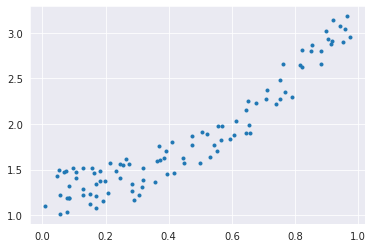

In [ ]:
x = np.random.rand(100)
noise = 0.5 * np.random.rand(100)
y = 2*x ** 2 + 1 + noise  # [2, 0, 1]
plt.plot(x, y, '.')

In [ ]:
n_pop = 100
pop = np.random.randn(n_pop, 3)
pop

array([[-1.70834970e-01, -1.42912447e-01, -6.11646640e-01],
       [ 4.47395819e-01, -5.12909721e-02,  7.20258399e-01],
       [-6.34738047e-02,  2.13764033e-01, -1.56494997e+00],
       [-5.03248857e-01, -6.11101227e-01, -7.62778324e-01],
       [-6.05768548e-01,  1.32827816e+00, -2.39031388e-01],
       [ 1.25046012e-01,  6.46386235e-02,  4.34995998e-01],
       [-6.11905921e-02,  2.32136901e-01,  6.11349263e-01],
       [ 1.67123499e+00,  8.43328447e-01,  1.76154619e-01],
       [ 3.31778464e-01, -1.14577047e-01,  2.85548188e-01],
       [-7.09273665e-01, -2.90553353e-01, -5.63392595e-01],
       [ 3.60444446e-01,  1.25152026e+00, -4.75882204e-01],
       [ 1.32789688e+00, -3.43046423e-01, -1.75450512e-02],
       [-1.78085092e+00,  4.55068256e-01, -1.42106135e+00],
       [-3.27746686e-01, -6.91943602e-01, -5.93954560e-01],
       [-9.93352325e-01, -1.92427221e+00,  1.39109669e-02],
       [-3.55099331e-01,  1.35678715e+00, -1.09446444e+00],
       [-6.35857187e-01,  3.13173895e-01

In [ ]:
def fitness(pop):
  # lower is better
  F = []
  for p in pop:
    z = np.polyval(p, x)
    F.append(np.mean(np.abs(y - z)))
  return np.array(F)

In [ ]:
def mutate(p):
  i = np.random.randint(len(p))
  p[i] += np.random.randn() 
  return p

In [ ]:
for gen in range(100):
  F = fitness(pop)
  idx = F.argsort()
  print(f'gen: {gen}: fitness = {F[idx[0]]}')
  pop = pop[idx]
  # selection (keep 50%) and reproduction (50%)
  for i in range(50, n_pop):
    pop[i] = mutate(pop[i])

gen: 0: fitness = 0.16362857935935665
gen: 1: fitness = 0.16362857935935665
gen: 2: fitness = 0.16362857935935665
gen: 3: fitness = 0.16362857935935665
gen: 4: fitness = 0.16362857935935665
gen: 5: fitness = 0.16362857935935665
gen: 6: fitness = 0.16362857935935665
gen: 7: fitness = 0.16362857935935665
gen: 8: fitness = 0.16362857935935665
gen: 9: fitness = 0.16362857935935665
gen: 10: fitness = 0.16362857935935665
gen: 11: fitness = 0.16362857935935665
gen: 12: fitness = 0.16362857935935665
gen: 13: fitness = 0.16362857935935665
gen: 14: fitness = 0.16362857935935665
gen: 15: fitness = 0.16362857935935665
gen: 16: fitness = 0.16362857935935665
gen: 17: fitness = 0.16362857935935665
gen: 18: fitness = 0.16362857935935665
gen: 19: fitness = 0.16362857935935665
gen: 20: fitness = 0.16362857935935665
gen: 21: fitness = 0.16362857935935665
gen: 22: fitness = 0.16362857935935665
gen: 23: fitness = 0.16362857935935665
gen: 24: fitness = 0.16362857935935665
gen: 25: fitness = 0.16362857935935

In [ ]:
pop[0]

array([1.75086058, 0.55938631, 0.98543678])

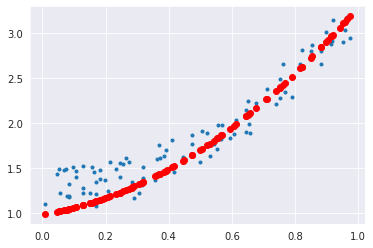

In [ ]:
z = np.polyval(pop[0], x)
plt.plot(x, y, '.')
plt.plot(x, z, 'or')

## TSP

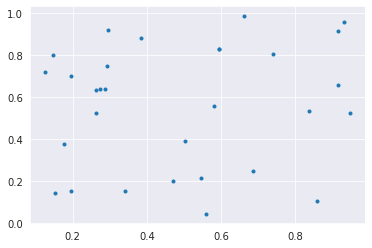

In [ ]:
n_cities = 30
cities = np.random.rand(n_cities, 2)
plt.plot(cities[:, 0], cities[:, 1], '.')

In [ ]:
n_pop = 100
pop = []
for i in range(n_pop):
   pop.append(np.random.permutation(n_cities))
pop = np.array(pop)

In [ ]:
pop

array([[ 4, 20, 17, ...,  8, 19, 27],
       [19, 21, 28, ..., 15,  0, 22],
       [23, 19, 14, ..., 18, 27, 21],
       ...,
       [11, 18,  1, ...,  5, 27,  2],
       [20, 18, 19, ..., 25,  2,  9],
       [19, 28, 21, ..., 22, 12, 23]])

In [ ]:
def fitness(pop):
  F = []
  for p in pop:
    s = 0
    for i in range(len(p)):
      j = i + 1 if i + 1 < len(p) else 0
      s += np.sqrt(np.sum((cities[p][i] - cities[p][j]) ** 2)) 
    F.append(s)
  return np.array(F)

In [ ]:
def mutate(p):
  i, j = np.random.permutation(len(p))[:2]
  p[[i, j]] = p[[j, i]]
  return p

In [ ]:
for gen in range(100):
  F = fitness(pop)
  idx = F.argsort()
  pop = pop[idx]
  print(f'gen: {gen}, fitness = {F[idx[0]]}')
  for p in pop[n_pop//2:]:
    # TODO crossover
    p = mutate(p)

gen: 0, fitness = 12.674218957541772
gen: 1, fitness = 12.674218957541772
gen: 2, fitness = 12.674218957541772
gen: 3, fitness = 12.674218957541772
gen: 4, fitness = 12.674218957541772
gen: 5, fitness = 12.674218957541772
gen: 6, fitness = 12.674218957541772
gen: 7, fitness = 12.674218957541772
gen: 8, fitness = 12.674218957541772
gen: 9, fitness = 12.674218957541772
gen: 10, fitness = 12.674218957541772
gen: 11, fitness = 12.674218957541772
gen: 12, fitness = 12.674218957541772
gen: 13, fitness = 12.674218957541772
gen: 14, fitness = 12.674218957541772
gen: 15, fitness = 12.674218957541772
gen: 16, fitness = 12.674218957541772
gen: 17, fitness = 12.674218957541772
gen: 18, fitness = 12.674218957541772
gen: 19, fitness = 12.674218957541772
gen: 20, fitness = 12.674218957541772
gen: 21, fitness = 12.674218957541772
gen: 22, fitness = 12.674218957541772
gen: 23, fitness = 12.674218957541772
gen: 24, fitness = 12.674218957541772
gen: 25, fitness = 12.558693987187
gen: 26, fitness = 12.558

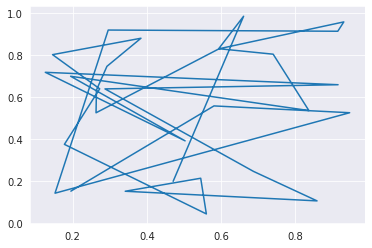

In [ ]:
plt.plot(cities[pop[0]][:, 0], cities[pop[0]][:, 1])

HW

In [ ]:
import pandas as pd

In [ ]:
# df = pd.read_csv('HR.csv')
url='https://drive.google.com/file/d/1uzkJ-dwvb4MrgqOeDE11nqRFGAdwfz9F/view?usp=share_link'
file_id=url.split('/')[-2]
print(file_id)
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

1uzkJ-dwvb4MrgqOeDE11nqRFGAdwfz9F


In [ ]:
df.describe()

,weight,height,age
count,358.000000,358.000000,358.000000
mean,72.108939,167.918994,41.237430
std,14.528707,9.558115,10.983412
min,38.000000,142.000000,22.000000
25%,61.000000,161.000000,32.000000
50%,70.000000,168.000000,41.000000
75%,84.000000,175.000000,51.000000
max,106.000000,195.000000,60.000000


##HR-Genetic Algorithms

import libary

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


In [ ]:
# df = pd.read_csv('HR.csv')
url='https://drive.google.com/file/d/1uzkJ-dwvb4MrgqOeDE11nqRFGAdwfz9F/view?usp=share_link'
file_id=url.split('/')[-2]
print(file_id)
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

1uzkJ-dwvb4MrgqOeDE11nqRFGAdwfz9F


In [ ]:
df


,gender,department,weight,height,age
0,Male,R,89,172,32
1,Male,R,89,180,52
2,Male,R,52,158,27
3,Male,R,50,157,39
4,Male,R,68,174,25
...,...,...,...,...,...
353,Female,J,73,168,38
354,Female,J,68,169,59
355,Female,J,49,155,33
356,Female,J,101,187,60


In [ ]:
df.describe()

,weight,height,age
count,358.000000,358.000000,358.000000
mean,72.108939,167.918994,41.237430
std,14.528707,9.558115,10.983412
min,38.000000,142.000000,22.000000
25%,61.000000,161.000000,32.000000
50%,70.000000,168.000000,41.000000
75%,84.000000,175.000000,51.000000
max,106.000000,195.000000,60.000000


In [ ]:
df.nunique()

gender         2
department    19
weight        63
height        47
age           39
dtype: int64

- เท่าเทียม อายุ เพศ bmi
- สามัคคี
- สัมพันธ์ระหว่างแผนก

2 สี

![picture](https://www.researchgate.net/profile/Rodrigo-Reis-17/publication/340892707/figure/fig2/AS:999789642645506@1615379834179/Steps-of-genetic-algorithm-for-human-resource-allocation.ppm)

![picture](https://www.researchgate.net/profile/Stefan-Elfwing-2/publication/267856080/figure/fig6/AS:669423161573389@1536614327688/One-point-crossover-between-two-bit-string-genotypes.png)

![picture](https://miro.medium.com/max/720/1*zF3DzW57qD_LOGO1jQwdcg.webp)

ลบ ช่องว่าง

In [ ]:
df['department'] = df['department'].str.strip()

เพิ่ม col BMI

In [ ]:
df["BMI"] = df["weight"] / (df["height"]/100)**2
df

,gender,department,weight,height,age,BMI
0,Male,R,89,172,32,30.083829
1,Male,R,89,180,52,27.469136
2,Male,R,52,158,27,20.829995
3,Male,R,50,157,39,20.284799
4,Male,R,68,174,25,22.460034
...,...,...,...,...,...,...
353,Female,J,73,168,38,25.864512
354,Female,J,68,169,59,23.808690
355,Female,J,49,155,33,20.395421
356,Female,J,101,187,60,28.882725


(bmi_mean1 - bmi_mean2)m + (age_mean1 - age_mean2)m + (c1-c2)m + (gender1-gender2)m

In [ ]:
def fitness1(groupteam):
    group1 = df[groupteam == 1] # select data index groupteam == 1
    group2 = df[groupteam == 0]
    fitness_score = 0

    bmi_mean1, bmi_mean2 = group1['BMI'].mean(), group2['BMI'].mean()
    fitness_score += abs(bmi_mean1 - bmi_mean2)

    age_mean1, age_mean2 = group1['age'].mean(), group2['age'].mean()
    fitness_score += abs(age_mean1 - age_mean2)

    c1, c2 = group1['department'].value_counts(), group2['department'].value_counts()
    fitness_score += abs(c1-c2).mean()

    gender1, gender2 = group1['gender'].value_counts(), group2['gender'].value_counts()
    fitness_score += abs(gender1-gender2).mean()

    return fitness_score

mutation ทำาการ random เปลี่ยน 0 เป็น 1

In [ ]:
def mutation(team_set):
  random_index = random.randint(0, len(team_set)-1)
  mutated_individual = team_set.copy()
  mutated_individual[random_index] = 1 if team_set[random_index] == 0 else 0
  return mutated_individual

In [ ]:
def crossover(team_set1, team_set2):
  random_index = random.randint(0, len(team_set1)-1)
  offspring1 = np.concatenate([team_set1[:random_index], team_set2[random_index:]])
  offspring2 = np.concatenate([team_set2[:random_index], team_set1[random_index:]])
  return offspring1, offspring2

Select the best group top 10 Rank

1.   population เป็น array 100 แบบ ขนาดเท่า จำนวนสมาชิกทั้งหมด 
2.   fitness_scores เป็นแต้ม ของ array 100 แบบ 
3.   num_parents จำนวน พ่อพันธ์

Return TOP 10


In [ ]:
def selection(population, fitness_scores, num_parents):
  parent_indices = np.argsort(fitness_scores)[:num_parents]
  parents = [population[i] for i in parent_indices]
  return parents

ทำการสุ่ม 0-1 ตามจำนวนสมาชิกทั้งหมด 100 แบบ

In [ ]:
population = [np.random.randint(0, 2, size=len(df)) for _ in range(100)]
print(len(population))
print(len(population[0]))
population[0]

100
358


array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
num_generations = 100
num_parents = 20 

In [ ]:
for generation in range(num_generations):
  fitness_scores = [fitness1(team_set) for team_set in population] # calculate fitness score
  parents = selection(population, fitness_scores, num_parents) # select rank top 10
  print(min(fitness_scores))
  team_sets = []
  for i in range(0, len(parents), 2): # step = 2 , start crossover 
    if i + 1 < len(parents): # len parents = num_parents
      team_set1, team_set2 = crossover(parents[i], parents[i+1]) # (0,1),(2,3),(4,5)
      team_sets.append(team_set1)
      team_sets.append(team_set2)
    else: break # end crossover
  team_sets = [mutation(team_set) for team_set in team_sets] # matation
  population = parents + team_sets # final data in generation

4.259857840142335
4.259857840142335
4.259857840142335
3.2484038508896917
3.2484038508896917
3.2484038508896917
3.2484038508896917
2.820450746605419
2.820450746605419
2.820450746605419
2.356926831616147
2.356926831616147
2.3435218224060836
2.3435218224060836
1.971658762215719
1.971658762215719
1.6942198017456853
1.6942198017456853
1.6942198017456853
1.6942198017456853
1.6942198017456853
1.6942198017456853
1.6942198017456853
1.6942198017456853
1.6942198017456853
1.6942198017456853
1.6942198017456853
1.6942198017456853
1.4951060835612142
1.4951060835612142
1.4951060835612142
1.4951060835612142
1.4951060835612142
1.4951060835612142
1.4951060835612142
1.4951060835612142
1.4951060835612142
1.4951060835612142
1.4951060835612142
1.4951060835612142
1.4530231040762507
1.4530231040762507
1.4530231040762507
1.4530231040762507
1.4530231040762507
1.4530231040762507
1.3825424543345715
1.3825424543345715
1.3825424543345715
1.3825424543345715
1.3825424543345715
1.3825424543345715
1.3106442465991952
1.3

In [ ]:
fitness_scores = [fitness1(team_set) for team_set in population]
best_team_set = population[np.argmin(fitness_scores)]
np.min(fitness_scores)


0.9559570516414068

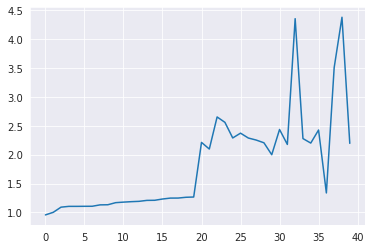

In [ ]:
plt.plot(fitness_scores)

In [ ]:
df["group"] = best_team_set

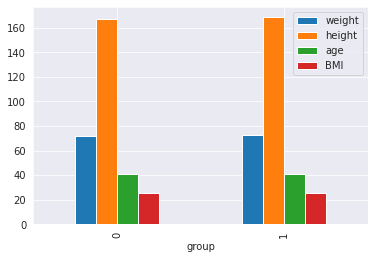

In [ ]:
df.groupby("group").mean().plot(kind="bar")

In [ ]:
df[df['group'] == 1].mean()

<ipython-input-315-592df3c06ae4>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['group'] == 1].mean()


weight     72.631285
height    168.430168
age        41.206704
BMI        25.313313
group       1.000000
dtype: float64

In [ ]:
df[df['group'] == 0].mean()

<ipython-input-316-71df49d2b1ac>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['group'] == 0].mean()


weight     71.586592
height    167.407821
age        41.268156
BMI        25.252142
group       0.000000
dtype: float64

In [ ]:
df.groupby(['group', 'gender']).size().reset_index(name='counts')

,group,gender,counts
0,0,Female,118
1,0,Male,61
2,1,Female,118
3,1,Male,61


In [ ]:
df['gender'].value_counts()

Female    236
Male      122
Name: gender, dtype: int64

               0   1
department          
A            4.0   2
C            3.0   3
D           36.0  36
E            7.0   7
F           14.0  14
G           20.0  20
H            5.0   5
I            3.0   4
J           15.0  14
K            7.0  12
L            5.0   5
M            8.0   6
N            4.0   4
O           17.0  15
P           11.0  11
Q            2.0   3
R           12.0  11
S            6.0   6
B            NaN   1
   department  dif
0           A  2.0
1           B  NaN
2           C  0.0
3           D  0.0
4           E  0.0
5           F  0.0
6           G  0.0
7           H  0.0
8           I  1.0
9           J  1.0
10          K  5.0
11          L  0.0
12          M  2.0
13          N  0.0
14          O  2.0
15          P  0.0
16          Q  1.0
17          R  1.0
18          S  0.0


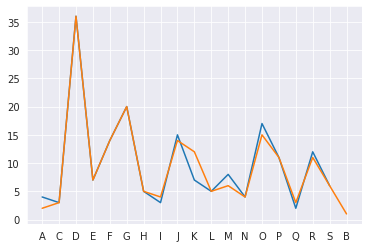

In [ ]:
a = df[df['group']== 0].groupby(['department']).size()
b = df[df['group']== 1].groupby(['department']).size()
c =  pd.concat([a, b], axis=1)
print(c)

dif =  abs( a - b ).reset_index(name='dif')
print(dif)

plt.plot(c)

#Basic Narual Network

##Multilayer Perceptron from Scratch

https://colab.research.google.com/drive/1ebvDCrmLGA70yoqFaWSeihf7AoV1hiez?usp=sharing

##Perceptron

In [ ]:
import numpy as np

In [ ]:
# AND
X = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
Y = np.array([1, -1, -1, -1])

In [ ]:
# OR
X = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
Y = np.array([1, 1, 1, -1])

In [ ]:
X_ = np.hstack((X, np.ones((len(X), 1), dtype=int)))
X_

array([[ 1,  1,  1],
       [ 1, -1,  1],
       [-1,  1,  1],
       [-1, -1,  1]])

In [ ]:
for i in range(len(Y)):
  print(X_[i] * Y[i])

[1 1 1]
[ 1 -1  1]
[-1  1  1]
[ 1  1 -1]


In [ ]:
i = np.random.randint(len(X))
W = X_[i] * Y[i]
print(W)

[-1  1  1]


In [ ]:
all_pass = False
while not all_pass:
  all_pass = True
  for i in range(len(X_)):
    x = X_[i] * Y[i]
    p = np.dot(W, x)
    print(p)
    if p < 0:
      all_pass = False
      W = W + x
      print(W)
      break

1
-1
[0 0 2]
2
2
2
-2
[1 1 1]
3
1
1
1


In [ ]:
z = np.sign(X_ @ W[:, None]).flatten()

In [ ]:
np.sum(z == Y) / len(Y) * 100

100.0

##MLP - Multi Layer Perceptron

![](https://drive.google.com/uc?id=11AAw5QZZSU8ha5r-m4LBHi4uAq2-iLrX)

![]()

![](https://drive.google.com/uc?id=1D3N68l6OXqNBE5hRxW2PUFlxtIMa3Ig9)

In [ ]:
import seaborn as sns
df = sns.load_dataset('iris')

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
X = df.iloc[:, :-1].values

In [ ]:
X.shape

(150, 4)

In [ ]:
y = df.iloc[:, -1].values

In [ ]:
np.unique(y)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
def onehotencoder(y):
  labels = list(np.unique(y))
  Y = np.zeros((len(y), len(labels)))
  for i in range(len(y)):
    Y[i, labels.index(y[i])] = 1
  return Y, labels

In [ ]:
Y, labels = onehotencoder(y)
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

![](https://drive.google.com/uc?id=10rvU8J0gcDF6KFty054g4Y8iaivqCw8Y)

(4) -> 10 -> 20 -> 10 -> (3)
* W1 = 4+1 -> 10
* W2 = 10+1 -> 20
* W3 = 20+1 -> 10
* W4 = 10+1 -> 3

In [ ]:
h = [10, 20, 10]
h = [X.shape[1]] + h + [len(labels)]
h

[4, 10, 20, 10, 3]

In [ ]:
W = []
for i in range(len(h) - 1):
  W.append(np.random.rand(h[i]+1, h[i+1]))
print(len(W))
print(len(W[0]))

4
5


In [ ]:
for w in W:
  print(w.shape)

(5, 10)
(11, 20)
(21, 10)
(11, 3)


In [3]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

###forward

In [ ]:
def aug_one(X):
  return np.hstack((X, np.ones((len(X), 1))))

In [ ]:
h1 = sigmoid(aug_one(X) @ W[0])

In [ ]:
h2 = sigmoid(aug_one(h1) @ W[1])
h2.shape

(150, 20)

In [ ]:
h3 = sigmoid(aug_one(h2) @ W[2])
h3.shape

(150, 10)

In [ ]:
h4 = sigmoid(aug_one(h3) @ W[3])
h4.shape

(150, 3)

In [ ]:
X_ = X.copy()

In [ ]:
X = X_.copy()
input = [X]
for i in range(len(W)):
  input.append(sigmoid(aug_one(input[i]) @ W[i]))

In [ ]:
len(input)

5

In [ ]:
labels

['setosa', 'versicolor', 'virginica']

In [ ]:
[labels[i] for i in X.argmax(axis=1)]

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',

### backward

![ข้อความลิงก์](https://drive.google.com/uc?id=1Pj7yz1seM8NR4oh3x8-JnQKhaWq60Er1)

![ข้อความลิงก์](https://drive.google.com/uc?id=1X2IFwu5alIKeWSgizl4f82otOiOwtpLu)

(4) -> 10 -> 20 -> 10 -> (3)
* W1 = 4+1 -> 10
* W2 = 10+1 -> 20
* W3 = 20+1 -> 10
* W4 = 10+1 -> 3

In [ ]:
lr = 0.1 # Learning Rate

In [ ]:
e = Y - input[-1]

In [ ]:
e.shape

(150, 3)

delta

In [ ]:
delta = input[-1] * (1 - input[-1]) * (Y - input[-1]) #delta Output layer Ok

In [ ]:
delta.shape

(150, 3)

In [ ]:
input[-2].shape

(150, 10)

In [ ]:
W[-1].shape # want

(11, 3)

update weight 1

In [ ]:
dW = lr * aug_one(input[-2]).T @ delta # (11, 150) @ (150, 3)

In [ ]:
dW.shape

(11, 3)

In [ ]:
W[-1] = W[-1] + dW

delta

In [ ]:
Oh = aug_one(input[-2])
delta_h = Oh * (1 - Oh) * (delta @ W[-1].T) #delta h  Output layer Oh 1

In [ ]:
delta_h.shape

(150, 11)

In [ ]:
W[-2].shape # want (21, 10)

(21, 10)

In [ ]:
input[-3].shape

(150, 20)

In [ ]:
delta_h[:, :-1].shape

(150, 10)

update weight 2

In [ ]:
dW = lr * aug_one(input[-3]).T @ delta_h[:, :-1]

In [ ]:
dW.shape

(21, 10)

In [ ]:
W[-2] = W[-2] + dW

delta

In [ ]:
Oh = aug_one(input[-3])
delta = delta_h[:, :-1]
delta_h = Oh * (1 - Oh) * (delta @ W[-2].T) #delta h  Output layer Oh 2

In [ ]:
delta_h.shape

(150, 21)

In [ ]:
W[-3].shape #want

(11, 20)

update weight 3

In [ ]:
dW = lr * aug_one(input[-4]).T @ delta_h[:, :-1]

In [ ]:
dW.shape

(11, 20)

In [ ]:
W[-3] = W[-3] + dW

delta

In [ ]:
Oh = aug_one(input[-4])
delta = delta_h[:, :-1]
delta_h = Oh * (1 - Oh) * (delta @ W[-3].T) #delta h  Output layer Oh 3

In [ ]:
delta_h.shape

(150, 11)

In [ ]:
W[-4].shape # want

(5, 10)

update w 4

In [ ]:
dW = lr * aug_one(input[-5]).T @ delta_h[:, :-1]

In [ ]:
dW.shape

(5, 10)

In [ ]:
W[-4] = W[-4] + dW

delta

In [ ]:
Oh = aug_one(input[-5])
delta = delta_h[:, :-1]
delta_h = Oh * (1 - Oh) * (delta @ W[-4].T) #delta h  Output layer Oh 4

In [ ]:
delta_h.shape

(150, 5)

![ข้อความลิงก์](https://drive.google.com/uc?id=1HoBvYyA4GXeUcjHTHKajkyhYXRsgyBkM)

In [ ]:
sum([w.size for w in W])

513

### Backward loop

In [5]:
def MLP(X, Y, lr=0.1, epochs=100, h=[10, 20, 10]):
  # initial weights
  h = [X.shape[1]] + h + [len(labels)]
  W = []
  for i in range(len(h) - 1):
    W.append(np.random.rand(h[i]+1, h[i+1]))

  for epoch in range(epochs):

    #===== forward
    input = [X]
    for i in range(len(W)):
      input.append(sigmoid(aug_one(input[i]) @ W[i]))

    #===== backward
    # output layer
    e = Y - input[-1]
    if epoch % 100 == 0:
      print(f'{epoch}: loss = {np.mean(e ** 2)}')
    delta = input[-1] * (1 - input[-1]) * (Y - input[-1])

    # update w
    dW = lr * aug_one(input[-2]).T @ delta
    W[-1] = W[-1] + dW
    #print(f'update w[{-1}]')

    for i in range(-1, 1 - len(h), -1):
      # hidden layers
      Oh = aug_one(input[i - 1]) # -2..-4
      delta = Oh * (1 - Oh) * (delta @ W[i].T)  # -1..-3
      delta = delta[:, :-1]
      # update w
      dW = lr * aug_one(input[i - 2]).T @ delta # -3..-5
      W[i - 1] = W[i - 1] + dW #-2..-4
      #print(f'update w[{i-1}]')
  return W

In [ ]:
def forward(W, X):
  input = X.copy()
  for i in range(len(W)):
    input = sigmoid(aug_one(input) @ W[i])
  return input

In [ ]:
itrain = np.r_[:25, 50:75, 100:125]
itest = np.r_[25:50, 75:100, 125:150]

Xtrain = X_[itrain]
Xtest = X_[itest]
Ytrain = Y[itrain]
Ytest = Y[itest]

In [ ]:
W = MLP(Xtrain, Ytrain, lr=0.01, epochs=1500)

0: loss = 0.6584505998650093
100: loss = 0.2222227750943674
200: loss = 0.22222222048817497
300: loss = 0.22222222048646853
400: loss = 0.22222222048476215
500: loss = 0.22222222048305582
600: loss = 0.22222222048134954
700: loss = 0.22222222047964332
800: loss = 0.22222222047793708
900: loss = 0.22222222047623094
1000: loss = 0.2222222204745249
1100: loss = 0.22222222047281884
1200: loss = 0.22222222047111284
1300: loss = 0.22222222046940687
1400: loss = 0.22222222046770096


In [ ]:
Ztest = forward(W, Xtest)

In [ ]:
Ztest.shape

(75, 3)

In [ ]:
Ytest.shape

(75, 3)

In [ ]:
np.sum(Ztest.argmax(axis=1) == Ytest.argmax(axis=1)) / len(Ztest)

0.3333333333333333

# Time series

In [2]:
x = np.arange(1,9)
x

array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
def gen_xy(x, windows=3):
    X = []
    Y = []
    for i in range(len(X)-windows):
        X.append(x[i:i+windows])
        Y.append(x[i+windows])
    return np.array(X), np.array(Y)

    